# Splitting Schemes for Segregated solvers
Let consider
\begin{equation}
\begin{matrix}
(E_0)\\
(E_1)
\end{matrix}
\quad
\begin{cases}
    Au + Bv = f_1\\
    Cv - Du = f_2
\end{cases}
\end{equation}

We are interested to solve the Poisson-Nerst-Plank equation for a single species
\begin{equation}
\begin{matrix}
(0)\\
(1)
\end{matrix}
\begin{cases}
\Delta\phi - \frac{Fz}{\varepsilon}c = 0\\
\partial_t c + \nabla\cdot\left( -D\nabla c +D\frac{Fz}{RT}\nabla\phi\,c + \mathbf{u}\,c \right)=0
\end{cases}
\end{equation}
___
## Method 0 (Florin)
\begin{equation}
\begin{matrix}
(P_0)\\
(P_1)
\end{matrix}
\quad
\begin{cases}
    Au^{(k+2)} + Bv^{(k+1)} = f_1 + L\left(u^{(k+2)}-u^{k+1}\right)\\
    Cv^{(k+1)} - Du^{(k)} = f_2 + L\left(v^{(k+1)}-v^{k}\right)
\end{cases}
\qquad
L\in\mathbb{R}
\end{equation}

Problem $(P_1)$ consists o solving the system $$\left(C - LI\right)v^{k+1} = f_2 + Du^k-Lv^k$$

Problem $(P_0)$ consists on solving $$(A - LI)u^{(k+2)}=f_1 - Bv^{(k+1)} - Lu^{k+1}$$

therefore we can build the sequence 

$$v^{(0)}\overset{(P_1)}{\longrightarrow} u^{(0)} \overset{(P_0)}{\longrightarrow} v^{(1)}\overset{(P_1)}{\longrightarrow} u^{(1)} \overset{(P_0)}{\longrightarrow} v^{(2)}\overset{(P_1)}{\longrightarrow} u^{2} \overset{(P_0)}{\longrightarrow} v^{3}\overset{(P_1)}{\longrightarrow} u^{3} \overset{(P_0)}{\longrightarrow} v^{4}\overset{(P_1)}{\longrightarrow} u^{4} \overset{(P_0)}{\longrightarrow} \dots$$
___
## Method 1
$$Au = \lambda u + (A - \lambda I)u \qquad \lambda\in\mathbb{R}$$

$$(E_0) \Rightarrow \lambda u = f_1 - Bv + (A-\lambda I)u$$


$$\lambda\,(E_1)\quad \Longrightarrow\quad \lambda Cv - D(\lambda u) = f_2\quad \Longrightarrow\quad \lambda Cv - D(f_1 - Bv + (A-\lambda I)u)=f_2\quad \Longrightarrow\quad (\lambda C - DB)v = f_2 + Df_1 + D(A-\lambda I)u$$


$$
\begin{matrix}
(P_0)\\
(P_1)
\end{matrix}
\quad
\begin{cases}
    Au^{(k+2)} + Bv^{(k+1)} = f_1\\
    (\lambda C + DB)v^{(k+1)} = f_2 + Df_1 +D(A - \lambda I)u^k
\end{cases}
$$

We can also consider the Florin's stabilization

$$
\begin{matrix}
(P_0)\\
(P_1)
\end{matrix}
\quad
\begin{cases}
    Au^{(k+2)} + Bv^{(k+1)} = f_1 + L\left(u^{(k+2)}-u^{k+1}\right) \\
    (\lambda C + DB)v^{(k+1)} = f_2 + Df_1 +D(A - \lambda I)u^k + L\left(v^{(k+1)}-v^{k}\right)
\end{cases}
\qquad
L\in\mathbb{R}
$$

Problem $(P_1)$ consists o solving the system 
$$(\lambda C + DB - LI)v^{(k+1)} = f_2 + Df_1 +D(A - \lambda I)u^k - Lv^{k}$$

Problem $(P_0)$ consists on solving
$$(A - LI)u^{(k+2)}=f_1 - Bv^{(k+1)} - Lu^{k+1}$$

therefore we can build the sequence 

$$v^{(0)}\overset{(P_1)}{\longrightarrow} u^{(0)} \overset{(P_0)}{\longrightarrow} v^{(1)}\overset{(P_1)}{\longrightarrow} u^{(1)} \overset{(P_0)}{\longrightarrow} v^{(2)}\overset{(P_1)}{\longrightarrow} u^{2} \overset{(P_0)}{\longrightarrow} v^{3}\overset{(P_1)}{\longrightarrow} u^{3} \overset{(P_0)}{\longrightarrow} v^{4}\overset{(P_1)}{\longrightarrow} u^{4} \overset{(P_0)}{\longrightarrow} \dots$$
___

## Method 2
$$Au = \mathbb{D} u + (A - \mathbb{D} )u \qquad \mathbb{D}\text{ is a diagonal matrix, for example the diagonal of }A$$

$$(E_0) \quad\Longrightarrow\quad \mathbb{D} u = f_1 - Bv - (A-\mathbb{D})u$$
$$ h := (A-\mathbb{D})u \quad\Longrightarrow\quad \mathbb{D} u = f_1 -h -Bv \quad\Longrightarrow\quad u=\mathbb{D}^{-1}f_1 - \mathbb{D}^{-1}h - \mathbb{D}^{-1}Bv$$

$$(E_1) \quad\Longrightarrow\quad Cv - Du = f_2 \quad\Longrightarrow\quad Cv - D(\mathbb{D}^{-1}f_1 - \mathbb{D}^{-1}h - \mathbb{D}^{-1}Bv)=f_2 \quad\Longrightarrow\quad (C + D\mathbb{D}^{-1}B)v=f_2 + D\mathbb{D}^{-1}f_1 - \mathbb{D}^{-1}h$$

We can notice that the $\mathbb{D}^{-1}h$ term is analogous to the `HbyA` term in OpenFOAM


$$
\begin{matrix}
(P_0)\\
(P_1)
\end{matrix}
\quad
\begin{cases}
    Au^{(k+2)} + Bv^{(k+1)} = f_1\\
    (C + D\mathbb{D}^{-1}B)v^{(k+1)} = f_2 + D\mathbb{D}^{-1}f_1 - \mathbb{D}^{-1}h^{k}
\end{cases}
$$

We can also consider the Florin's stabilization

$$
\begin{matrix}
(P_0)\\
(P_1)
\end{matrix}
\quad
\begin{cases}
    Au^{(k+2)} + Bv^{(k+1)} = f_1 + L\left(u^{(k+2)}-u^{k+1}\right) \\
    (C + D\mathbb{D}^{-1}B)v^{(k+1)} = f_2 + D\mathbb{D}^{-1}f_1 - \mathbb{D}^{-1}h^{k} + L\left(v^{(k+1)}-v^{k}\right)
\end{cases}
\qquad
L\in\mathbb{R}
$$

Problem $(P_1)$ consists o solving the system 
$$(C + D\mathbb{D}^{-1}B - LI)v^{(k+1)} = f_2 + D\mathbb{D}^{-1}f_1 - \mathbb{D}^{-1}h^{k} -Lv^{k}$$

Problem $(P_0)$ consists on solving
$$(A - LI)u^{(k+2)}=f_1 - Bv^{(k+1)} - Lu^{k+1}$$

therefore we can build the sequence 

$$v^{(0)}\overset{(P_1)}{\longrightarrow} u^{(0)} \overset{(P_0)}{\longrightarrow} v^{(1)}\overset{(P_1)}{\longrightarrow} u^{(1)} \overset{(P_0)}{\longrightarrow} v^{(2)}\overset{(P_1)}{\longrightarrow} u^{2} \overset{(P_0)}{\longrightarrow} v^{3}\overset{(P_1)}{\longrightarrow} u^{3} \overset{(P_0)}{\longrightarrow} v^{4}\overset{(P_1)}{\longrightarrow} u^{4} \overset{(P_0)}{\longrightarrow} \dots$$

In [8]:
import numpy as np
import scipy.sparse as sparse
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [9]:
def solveP0(A, B, v1, b1):
    u2 = sparse.linalg.spsolve(A, b1-B.dot(v1))
    return u2

def solveP1(C, D, L, u0, v0, b2):
    n = C.shape[0]
    I = sparse.identity(n)
    v1 = sparse.linalg.spsolve(C-I.multiply(L), b2+D.dot(u0)-L*v0)
    return v1

def method_Florin(**kwargs):
    A = kwargs['A']
    B = kwargs['B']
    C = kwargs['C']
    D = kwargs['D']
    L = kwargs['L']
    b1 = kwargs['b1']
    b2 = kwargs['b2']
    nit = kwargs['nit']
    u = np.zeros(A.shape[0])
    v = np.zeros(A.shape[0])
    for i in range(nit):
        v = solveP1(C, D, L, u, v, b2)
        u = solveP0(A, B, v, b1)
    return u, v

def generateInvRandomMatrices(size):
    #X = sparse.identity(2*size).multiply(10)
    #A = X[:size,:size]
    #B = X[:size,size:]
    #C = X[size:,:size]
    #D = X[size:,size:]
    density = 0.2
    diag = 10
    A1 = sparse.rand(size, size, density=density, format="csr", random_state=41)
    B1 = sparse.rand(size, size, density=density, format="csr", random_state=42)
    C1 = sparse.rand(size, size, density=density, format="csr", random_state=43)
    D1 = sparse.rand(size, size, density=density, format="csr", random_state=44)
    A = sparse.triu(A1+sparse.identity(size).multiply(diag))
    B = sparse.triu(B1)
    C = sparse.triu(C1)
    D = sparse.triu(D1+sparse.identity(size).multiply(diag))
    return A, B, C, D

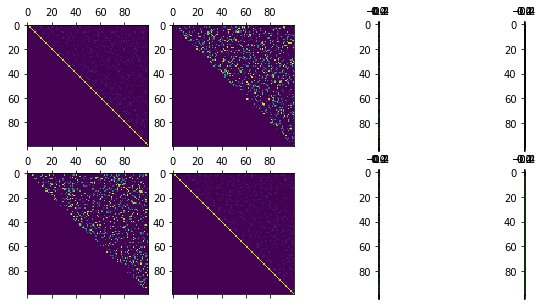

In [10]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
size = 100
density = 0.2
A, B, C, D = generateInvRandomMatrices(size)
L = 0.01
b1 = np.random.rand(size)
b2 = np.random.rand(size)
nit = 5

u, v = method_Florin(A=A, B=B, C=C, D=D, L=L, b1=b1, b2=b2, nit=nit)

fig, axs = plt.subplots(2, 4, figsize=(10,5))
axs[0,0].matshow(A.todense())
axs[0,1].matshow(B.todense())
axs[1,0].matshow(C.todense())
axs[1,1].matshow(D.todense())
axs[0,2].matshow(b1.reshape(size,1))
axs[1,2].matshow(b2.reshape(size,1))
axs[0,3].matshow(u.reshape(size,1))
axs[1,3].matshow(v.reshape(size,1))
plt.show()